<a href="https://colab.research.google.com/github/DogwonLee/Final-Team2/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%B4%EB%8F%84%EA%B6%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이도권: 룸 타입을 통한 기존 호텔과 다른 에어비앤비의 경쟁력

##데이터 LOAD

In [1]:
import pandas as pd

In [4]:
#데이터 불러오기
data = pd.read_csv('/content/combined_dataset.csv')

In [ ]:
#데이터 훑어보기
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.96,4.93,4.86,NaN,t,70,69,0,0,0.18
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.86,4.97,4.69,NaN,t,70,69,0,0,0.69
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.96,4.93,4.89,NaN,f,3,3,0,0,3.32
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.69,4.94,4.50,NaN,t,70,69,0,0,0.10
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.84,4.90,4.79,NaN,f,1,1,0,0,2.01


##여긴 어디인가?

In [ ]:
#동네 종류
data['neighbourhood_cleansed'].unique()

array(['Praha 1', 'Praha 2', 'Praha 3', 'Praha 7', 'Praha 5', 'Praha 15',
       'Praha 8', 'Praha 9', 'Praha 10', 'Praha 6', 'Praha 4', 'Praha 14',
       'Praha 13', 'Velká Chuchle', 'Kunratice', 'Zličín', 'Zbraslav',
       'Petrovice', 'Praha 21', 'Suchdol', 'Praha 12', 'Praha 11',
       'Praha 16', 'Klánovice', 'Praha 17', 'Šeberov', 'Štěrboholy',
       'Ďáblice', 'Dolní Počernice', 'Praha 18', 'Libuš', 'Řeporyje',
       'Březiněves', 'Nebušice', 'Satalice', 'Praha 22', 'Troja',
       'Dolní Chabry', 'Čakovice', 'Praha 19', 'Lipence', 'Újezd',
       'Dolní Měcholupy', 'Slivenec', 'Praha 20', 'Lysolaje', 'Vinoř',
       'Nedvězí', 'Koloděje', 'Přední Kopanina', 'Běchovice', 'Kolovraty',
       'Dubeč'], dtype=object)

##데이터 뜯어보기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            11446 non-null  int64   
 1   listing_url                                   11446 non-null  object  
 2   scrape_id                                     11446 non-null  int64   
 3   last_scraped                                  11446 non-null  object  
 4   source                                        11446 non-null  object  
 5   name                                          11446 non-null  object  
 6   description                                   9276 non-null   object  
 7   neighborhood_overview                         5663 non-null   object  
 8   picture_url                                   11446 non-null  object  
 9   host_id                                       1144

In [ ]:
#슈퍼호스트 컬럼의 Null값 개수
data['host_is_superhost'].isna().sum()

np.int64(273)

In [ ]:
#슈퍼호스트 컬럼의 Null값 비율
data['host_is_superhost'].isna().sum() / data['host_is_superhost'].count() # 2.4% 정도니 그냥 버리자!

np.float64(0.02443390315940213)



---



##Room Type

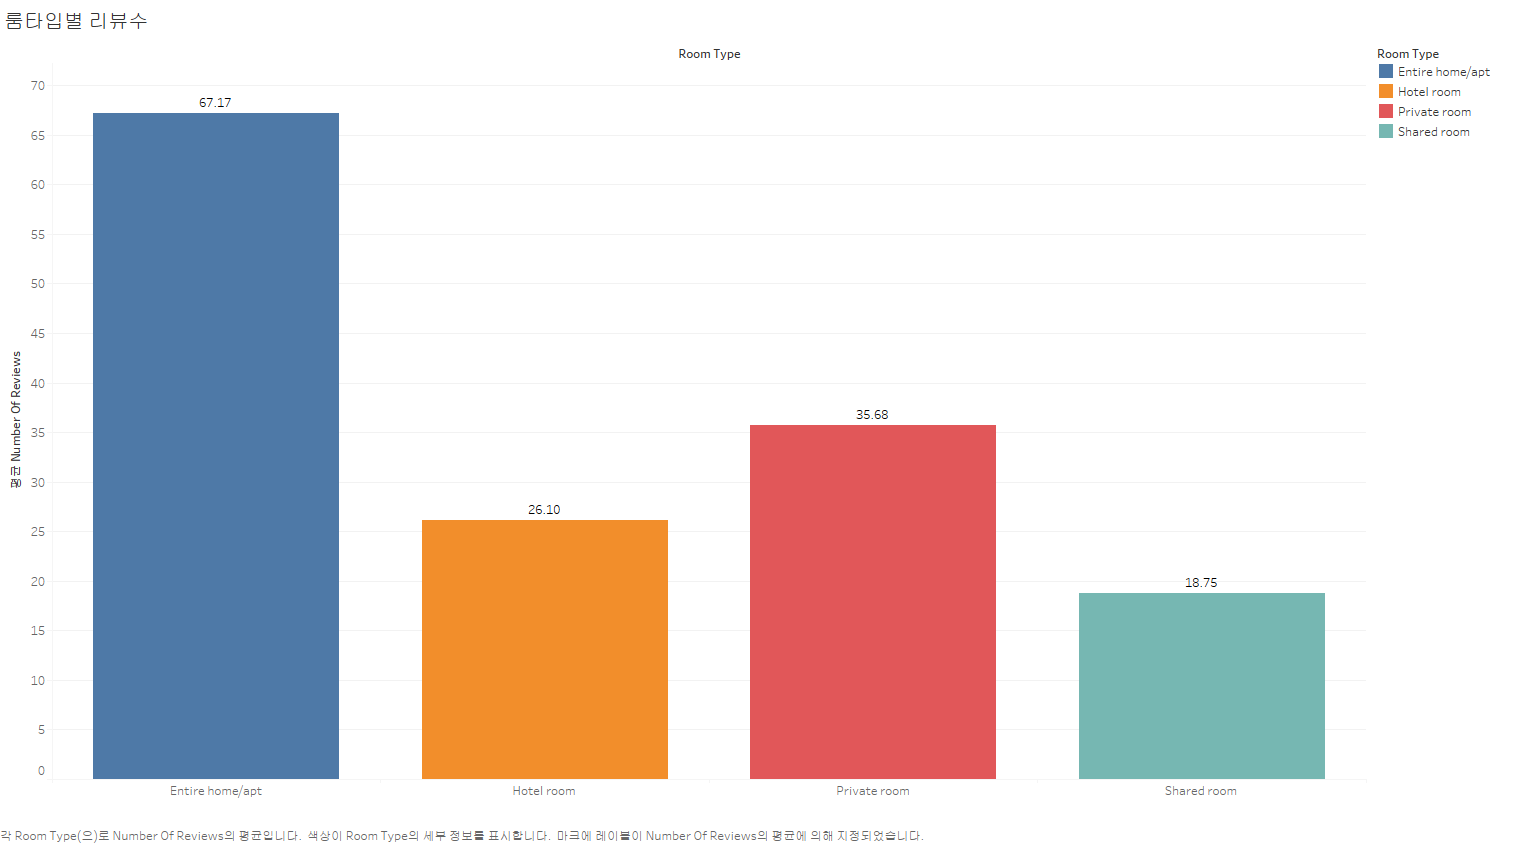

In [ ]:
# 룸타입 종류
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
# 룸타입의 결측치
data['room_type'].isna().sum() #없네.

np.int64(0)

In [3]:
# 룸타입별 가격
data2 = pd.read_csv('/content/airbnb_with_price_num.csv')

In [ ]:
data2[['room_type','price_num']]

,room_type,price_num
0,Entire home/apt,3955.0
1,Entire home/apt,2955.0
2,Entire home/apt,3223.0
3,Entire home/apt,6741.0
4,Entire home/apt,2763.0
...,...,...
11441,Private room,523.0
11442,Entire home/apt,2357.0
11443,Entire home/apt,1120.0
11444,Private room,1141.0


In [ ]:
# 룸타입별 가격
Entire_home_prices = data2[data2['room_type'] == 'Entire home/apt']['price_num']
Private_room_prices = data2[data2['room_type'] == 'Private room']['price_num']
Hotel_room_prices = data2[data2['room_type'] == 'Hotel room']['price_num']
Shared_room_prices = data2[data2['room_type'] == 'Shared room']['price_num']

In [ ]:
Entire_home_prices

,price_num
0,3955.0
1,2955.0
2,3223.0
3,6741.0
4,2763.0
...,...
11438,1635.0
11439,1635.0
11440,2400.0
11442,2357.0


In [26]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

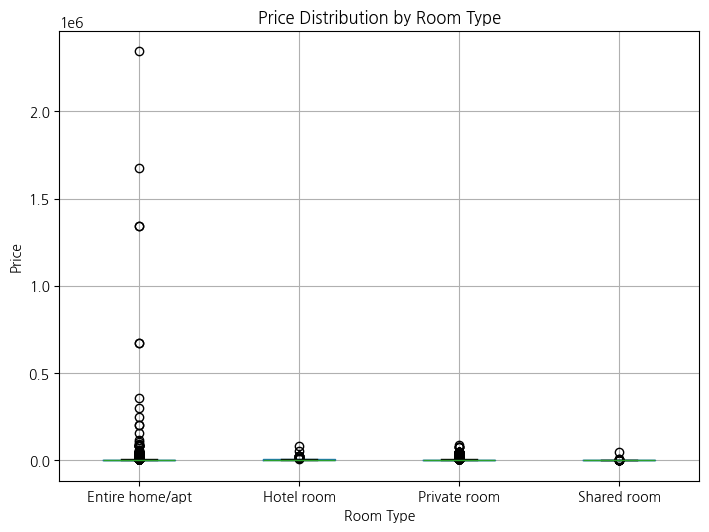

In [ ]:
import matplotlib.pyplot as plt

# DataFrame 이름이 df 라고 가정
data2.boxplot(column='price_num', by='room_type', figsize=(8,6))
plt.title('Price Distribution by Room Type')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


###룸타입별 이상치 제거

In [5]:
import numpy as np

In [6]:
import pandas as pd

def remove_outliers_by_type(df, room_type):
    """특정 room_type에 대해 IQR 기준 이상치 제거"""
    subset = df[df['room_type'] == room_type]
    q1  = subset['price_num'].quantile(0.25)
    q3  = subset['price_num'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return df[
        (df['room_type'] != room_type) |
        ((df['room_type'] == room_type) &
         (df['price_num'] >= lower) &
         (df['price_num'] <= upper))
    ]

# 원본을 단계별로 업데이트
no_outlier_all = data2.copy()

for rt in ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']:
    no_outlier_all = remove_outliers_by_type(no_outlier_all, rt)

# 결과 확인
print(no_outlier_all.shape)


(9809, 76)


### 가격을 수치화하고 이상치 제거한 버전 (no_outlier_all)

In [ ]:
no_outlier_all

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.93,4.86,NaN,t,70,69,0,0,0.18,3955.0
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.97,4.69,NaN,t,70,69,0,0,0.69,2955.0
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.93,4.89,NaN,f,3,3,0,0,3.32,3223.0
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.94,4.50,NaN,t,70,69,0,0,0.10,6741.0
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.90,4.79,NaN,f,1,1,0,0,2.01,2763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,NaN,t,1,0,1,0,NaN,523.0
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,NaN,f,1,1,0,0,NaN,2357.0
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,NaN,t,2,2,0,0,NaN,1120.0
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,NaN,t,5,0,5,0,NaN,1141.0


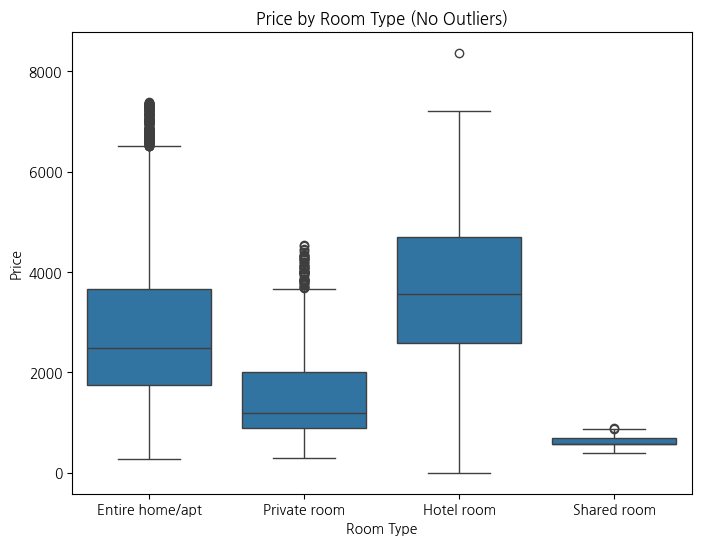

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price_num', data=no_outlier_all)
plt.title('Price by Room Type (No Outliers)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()




---



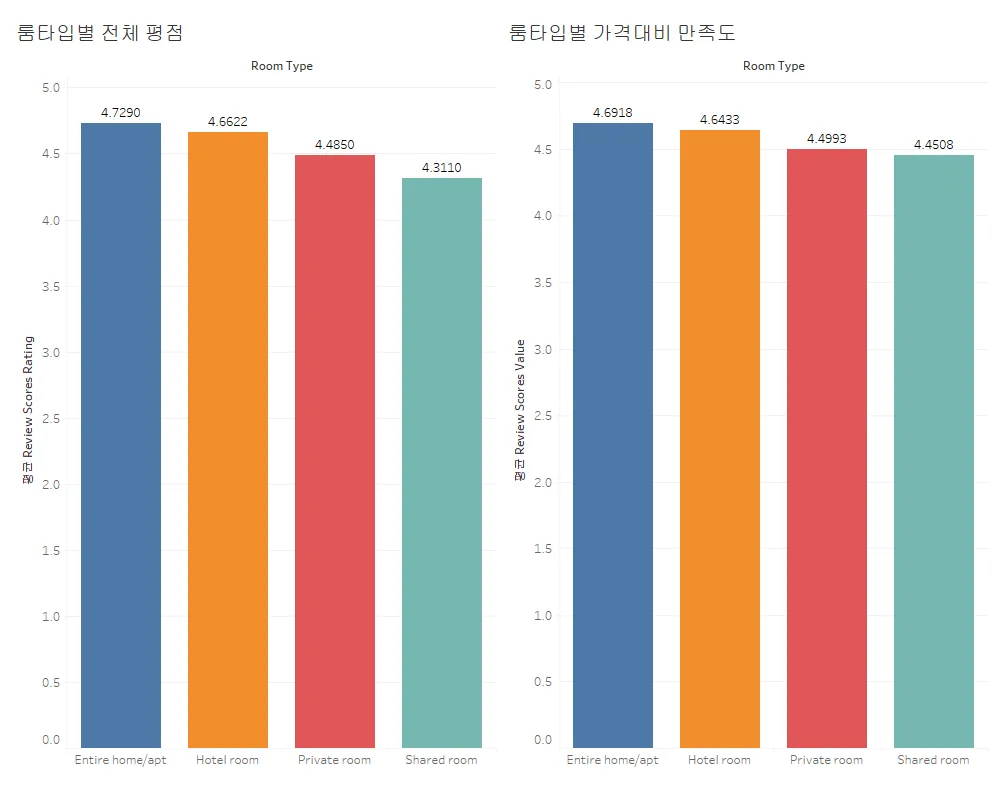

In [ ]:
# 평점에도 이상치가 있을까?
num_rating_greater_than_5 = (data['review_scores_rating'] > 5).sum()
print(f"review_scores_rating이 5보다 큰 값의 개수: {num_rating_greater_than_5}")
num_value_greater_than_5 = (data['review_scores_value'] > 5).sum()
print(f"review_scores_value이 5보다 큰 값의 개수: {num_value_greater_than_5}")

review_scores_rating이 5보다 큰 값의 개수: 0
review_scores_value이 5보다 큰 값의 개수: 0


##가격 대비 만족도 (제일 중요한 변수)

In [ ]:
data['review_scores_value']

,review_scores_value
0,4.86
1,4.69
2,4.89
3,4.50
4,4.79
...,...
11441,NaN
11442,NaN
11443,NaN
11444,NaN


In [4]:
data['review_scores_value'].describe()

,review_scores_value
count,9926.000000
mean,4.655840
std,0.415475
min,1.000000
25%,4.580000
50%,4.750000
75%,4.880000
max,5.000000


In [ ]:
# 개수
data['review_scores_value'].count()

np.int64(9926)

In [ ]:
# 결측치
data['review_scores_value'].isna().sum()

np.int64(1520)

In [ ]:
#가치 대비 만족도 컬럼의 Null값 비율
data['review_scores_value'].isna().sum() / data['review_scores_value'].count() # 15% 정도니 그냥 버리자!

np.float64(0.153133185573242)

## 전체 평점

In [5]:
data['review_scores_rating'].describe()

,review_scores_rating
count,9951.000000
mean,4.682039
std,0.434840
min,0.000000
25%,4.590000
50%,4.800000
75%,4.930000
max,5.000000


In [8]:
# 전체 평점 컬럼의 Null값 비율
data['review_scores_rating'].isna().sum() / data['review_scores_rating'].count()

np.float64(0.15023615717013367)

##추론 통계



*   귀무 가설 : Room Type 과 가격 대비 만족도 (가성비) 사이에 유의한 차이가 없다.
*   대립 가설 : Room Type 과 가격 대비 만족도 (가성비) 사이에 유의한 차이가 있다.




### 데이터 전처리

**MICE (다중 대체)**

In [5]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# 1) 대체할 컬럼 지정
cols = ['review_scores_value', 'review_scores_rating']

# 2) Imputer 설정 (MICE 느낌으로 sample_posterior 옵션도 가능)
imp = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)

# 3) 숫자형으로 준비 (문자형 섞였으면 변환)
X = data[cols].astype(float)

# 4) 적합 & 변환
imputed_arr = imp.fit_transform(X)            # shape: (11446, 2)

# 5) DataFrame으로 복원 (컬럼명과 인덱스 반드시 맞추기)
imputed_df = pd.DataFrame(imputed_arr, columns=cols, index=data.index)

# 6) 원본에 붙이되, 새 이름으로 보존
data[[c + '_imputed' for c in cols]] = imputed_df



In [6]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_scores_value_imputed,review_scores_rating_imputed
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.86,NaN,t,70,69,0,0,0.18,4.860000,4.900000
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.69,NaN,t,70,69,0,0,0.69,4.690000,4.730000
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.89,NaN,f,3,3,0,0,3.32,4.890000,4.940000
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.50,NaN,t,70,69,0,0,0.10,4.500000,4.750000
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.79,NaN,f,1,1,0,0,2.01,4.790000,4.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,t,1,0,1,0,NaN,4.203429,4.281269
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,f,1,1,0,0,NaN,4.716414,4.573974
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,t,2,2,0,0,NaN,4.684094,5.104478
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,t,5,0,5,0,NaN,4.754505,4.786890


In [20]:
data[['review_scores_value_imputed','review_scores_rating_imputed']]

,review_scores_value_imputed,review_scores_rating_imputed
0,4.860000,4.900000
1,4.690000,4.730000
2,4.890000,4.940000
3,4.500000,4.750000
4,4.790000,4.760000
...,...,...
11441,4.203429,4.281269
11442,4.716414,4.573974
11443,4.684094,5.104478
11444,4.754505,4.786890




---



**로그 스케일**

In [7]:
# 로그 변환 컬럼 만들기
data['review_scores_value_log'] = np.log(data['review_scores_value_imputed'])
data['review_scores_rating_log'] = np.log1p(data['review_scores_rating_imputed'])


In [8]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_scores_value_imputed,review_scores_rating_imputed,review_scores_value_log,review_scores_rating_log
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,t,70,69,0,0,0.18,4.860000,4.900000,1.581038,1.774952
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,t,70,69,0,0,0.69,4.690000,4.730000,1.545433,1.745716
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,f,3,3,0,0,3.32,4.890000,4.940000,1.587192,1.781709
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,t,70,69,0,0,0.10,4.500000,4.750000,1.504077,1.749200
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,f,1,1,0,0,2.01,4.790000,4.760000,1.566530,1.750937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,t,1,0,1,0,NaN,4.203429,4.281269,1.435901,1.664166
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,f,1,1,0,0,NaN,4.716414,4.573974,1.551049,1.718108
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,t,2,2,0,0,NaN,4.684094,5.104478,1.544173,1.809023
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,t,5,0,5,0,NaN,4.754505,4.786890,1.559093,1.755595


In [18]:
data[['review_scores_value_log','review_scores_rating_log']]


,review_scores_value_log,review_scores_rating_log
0,1.581038,1.774952
1,1.545433,1.745716
2,1.587192,1.781709
3,1.504077,1.749200
4,1.566530,1.750937
...,...,...
11441,1.435901,1.664166
11442,1.551049,1.718108
11443,1.544173,1.809023
11444,1.559093,1.755595


In [9]:
# 측정 변수들의 짧은 이름 정의
measurements = ['review_scores_value_log', 'review_scores_rating_log']
short_names = ['가성비 평점', '전체 평점']

### 정규성 검정

In [12]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

/tmp/ipython-input-1000362814.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


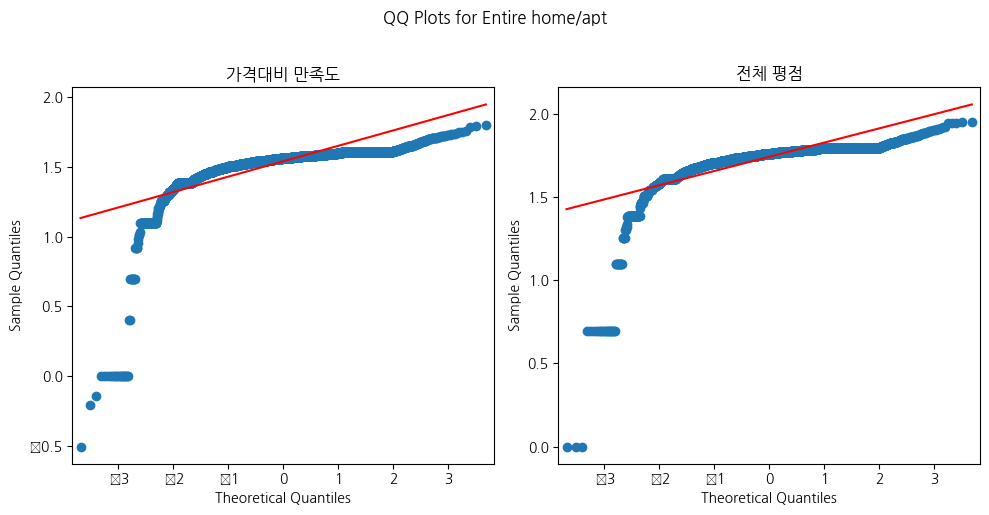

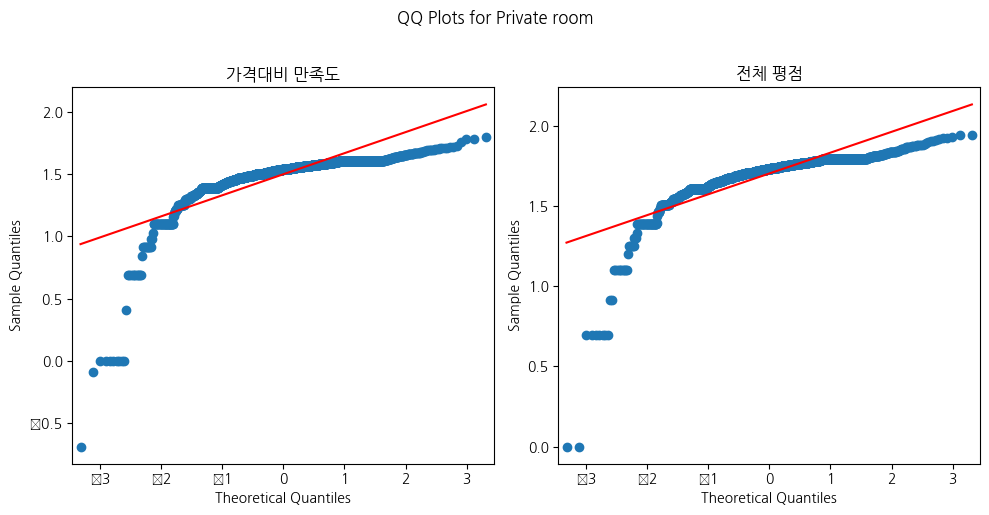

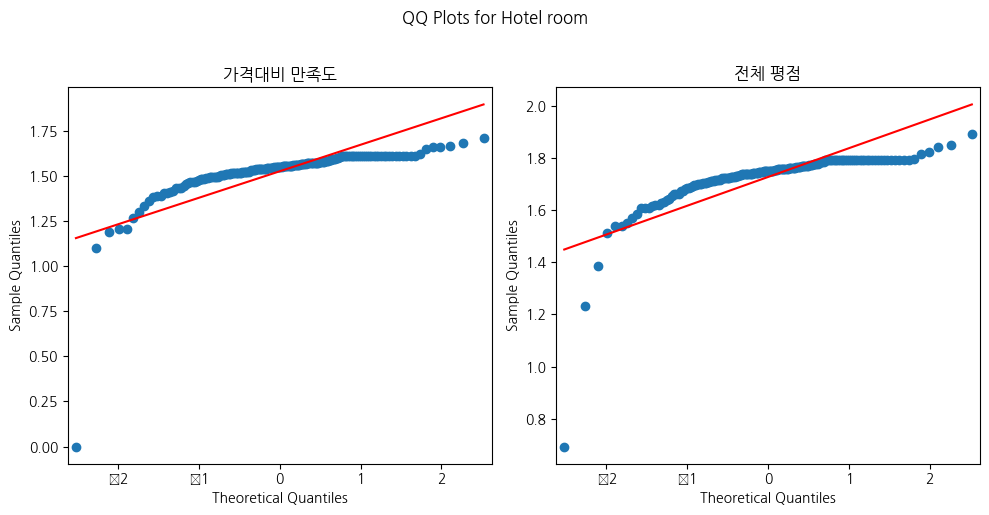

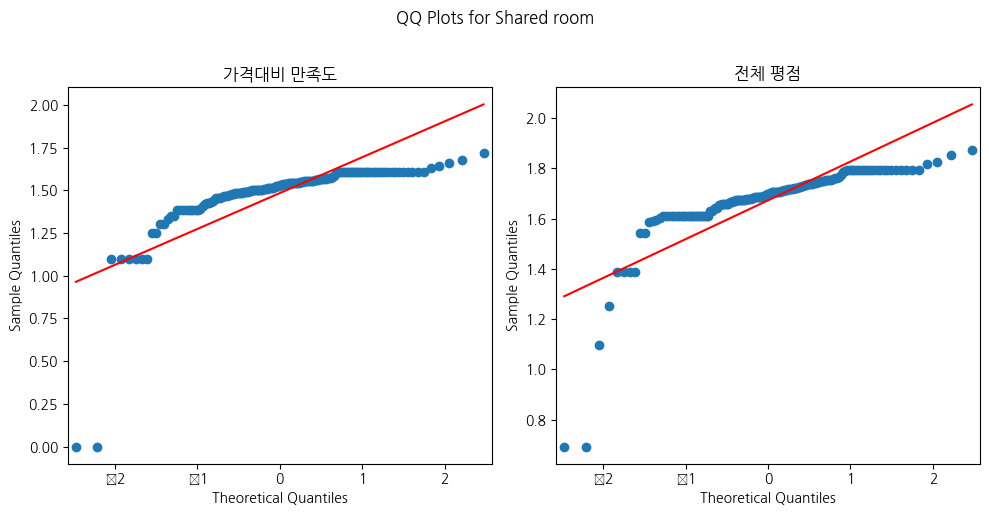

In [13]:
# QQ Plot 그리기

import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.font_manager as fm




room_types = data['room_type'].unique()

for room in room_types:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'QQ Plots for {room}', y=1.02) # Add a main title for each room type

    # 1) review_scores_value
    sm.qqplot(
        data.loc[data['room_type'] == room, 'review_scores_value_log'],
        line='s',
        ax=axes[0]
    )
    axes[0].set_title('가격대비 만족도')

    # 2) review_scores_rating
    sm.qqplot(
        data.loc[data['room_type'] == room, 'review_scores_rating_log'],
        line='s',
        ax=axes[1]
    )
    axes[1].set_title('전체 평점')

    plt.tight_layout()
    plt.show()

In [11]:
from scipy.stats import shapiro

# 로그 변환된 컬럼 이름 (여러분이 만든 컬럼명에 맞게 수정)
log_cols = ['review_scores_value_log', 'review_scores_rating_log']

print("=== 정규성 검정 (Shapiro-Wilk Test) ===")
print("H0: 데이터가 정규분포를 따른다")
print("p > 0.05이면 정규성 가정 충족\n")


for col in log_cols:
    print(f"[ 변수: {col} ]")
    for room in data['room_type'].unique():
        # room_type별, 해당 변수 데이터
        vals = data.loc[data['room_type'] == room, col].dropna()

        # Shapiro–Wilk 검정은 샘플 3개 이상 필요
        if len(vals) >= 3:
            stat, p = shapiro(vals)
            result = "정규성 충족" if p > 0.05 else "정규성 위반"
            print(f"  {room:20s}  n={len(vals):4d}  W={stat:.4f}  p={p:.4g}  → {result}")
        else:
            print(f"  {room:20s}  샘플 부족(n={len(vals)}) → 검정 불가")
    print()

=== 정규성 검정 (Shapiro-Wilk Test) ===
H0: 데이터가 정규분포를 따른다
p > 0.05이면 정규성 가정 충족

[ 변수: review_scores_value_log ]
  Entire home/apt       n=8957  W=0.4815  p=1.294e-95  → 정규성 위반
  Private room          n=2171  W=0.6014  p=3.006e-57  → 정규성 위반
  Hotel room            n= 170  W=0.4983  p=8.206e-22  → 정규성 위반
  Shared room           n= 148  W=0.5357  p=1.014e-19  → 정규성 위반

[ 변수: review_scores_rating_log ]
  Entire home/apt       n=8957  W=0.5134  p=4.326e-94  → 정규성 위반
  Private room          n=2171  W=0.6603  p=1.88e-54  → 정규성 위반
  Hotel room            n= 170  W=0.5521  p=9.595e-21  → 정규성 위반
  Shared room           n= 148  W=0.6206  p=5.922e-18  → 정규성 위반



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8957.
  res = hypotest_fun_out(*samples, **kwds)




*   정규성을 만족하지 않아 **비모수 검정 (Kruskal-Wallis)** 으로 가야한다






---



###Kruskal-Wallis




❓ **가설**

*   귀무가설(H₀) : 모든 룸타입의 모집단 분포(중앙값)가 같다.


*   대립가설(H₁) : 적어도 한 룸타입의 분포(중앙값)가 다르다.



In [15]:
from scipy.stats import kruskal

# 분석할 y 컬럼 리스트 (로그 변환된 컬럼명에 맞게 수정)
targets = ['review_scores_value_log', 'review_scores_rating_log']

print("=== Kruskal–Wallis H-test by room_type ===")
print("귀무가설(H0): room_type별 모집단 분포(중앙값)가 모두 같다.\n")

for col in targets:
    # room_type별 값 묶기
    groups = [
        data.loc[data['room_type'] == room, col].dropna()
        for room in data['room_type'].unique()
    ]

    # 검정 실행
    stat, p = kruskal(*groups)

    print(f"[변수: {col}]")
    print(f"  H 통계량 : {stat:.4f}")
    print(f"  p-value  : {p:.4e}")
    if p < 0.05:
        print("  → 귀무가설 기각: room_type 간 중앙값(분포)에 유의한 차이가 있음\n")
    else:
        print("  → 귀무가설 채택: room_type 간 유의한 차이가 없음\n")


=== Kruskal–Wallis H-test by room_type ===
귀무가설(H0): room_type별 모집단 분포(중앙값)가 모두 같다.

[변수: review_scores_value_log]
  H 통계량 : 179.6669
  p-value  : 1.0409e-38
  → 귀무가설 기각: room_type 간 중앙값(분포)에 유의한 차이가 있음

[변수: review_scores_rating_log]
  H 통계량 : 348.0665
  p-value  : 3.9115e-75
  → 귀무가설 기각: room_type 간 중앙값(분포)에 유의한 차이가 있음





---



###사후 검정 (Dunn Test)

In [17]:
pip install scikit-posthocs

In [18]:
import scikit_posthocs as sp

targets = ['review_scores_value_log', 'review_scores_rating_log']

for col in targets:
    print(f"\n=== Dunn post-hoc test: {col} ===")

    # p_adjust='bonferroni' : 보정 방법 (Holm, fdr_bh 등 다른 방법도 가능)
    dunn_result = sp.posthoc_dunn(
        data,
        val_col   = col,
        group_col = 'room_type',
        p_adjust  = 'bonferroni'
    )

    print(dunn_result)



=== Dunn post-hoc test: review_scores_value_log ===
                 Entire home/apt  Hotel room  Private room  Shared room
Entire home/apt     1.000000e+00    0.594063  5.573032e-37     0.000049
Hotel room          5.940634e-01    1.000000  1.450747e-01     0.188036
Private room        5.573032e-37    0.145075  1.000000e+00     1.000000
Shared room         4.886748e-05    0.188036  1.000000e+00     1.000000

=== Dunn post-hoc test: review_scores_rating_log ===
                 Entire home/apt    Hotel room  Private room   Shared room
Entire home/apt     1.000000e+00  4.333831e-01  2.869855e-63  6.792462e-18
Hotel room          4.333831e-01  1.000000e+00  5.255997e-03  8.419985e-07
Private room        2.869855e-63  5.255997e-03  1.000000e+00  7.157487e-04
Shared room         6.792462e-18  8.419985e-07  7.157487e-04  1.000000e+00


#### 결과 해석

가치 대비 만족도의 경우

| 비교쌍                                | p-value      | 해석       |
| ---------------------------------- | ------------ | -------- |
| **Entire home/apt ↔ Private room** | **5.57e-37** | ✅ 유의한 차이 |
| **Entire home/apt ↔ Shared room**  | **4.89e-05** | ✅ 유의한 차이 |
| Hotel room ↔ Private room          | 0.145        | ✖ 유의 X   |
| Hotel room ↔ Shared room           | 0.188        | ✖ 유의 X   |
| Private room ↔ Shared room         | 1.000        | ✖ 유의 X   |
| Entire home/apt ↔ Hotel room       | 0.594        | ✖ 유의 X   |


**해석**



*   Private room과 Entire home/apt 간 차이가 매우 큼.
*   Shared room도 Entire home/apt와 차이가 있음.

*   나머지 쌍(Hotel vs. others 등)은 통계적으로 유의한 차이 없음.










---



전체 평점의 경우

| 비교쌍                                | p-value      | 해석     |
| ---------------------------------- | ------------ | ------ |
| **Entire home/apt ↔ Private room** | **2.87e-63** | ✅ 유의   |
| **Entire home/apt ↔ Shared room**  | **6.79e-18** | ✅ 유의   |
| **Hotel room ↔ Private room**      | **5.26e-07** | ✅ 유의   |
| **Hotel room ↔ Shared room**       | **8.42e-07** | ✅ 유의   |
| **Private room ↔ Shared room**     | **7.16e-04** | ✅ 유의   |
| Entire home/apt ↔ Hotel room       | 0.433        | ✖ 유의 X |


**해석**



*   Private room과 대부분의 다른 타입(Entire, Hotel, Shared) 모두 차이 큼.
*   Shared room도 여러 타입과 차이가 큼.

*   Entire home/apt ↔ Hotel room 만 유의하지 않음 → 이 둘의 평점은 비슷.








##EDA

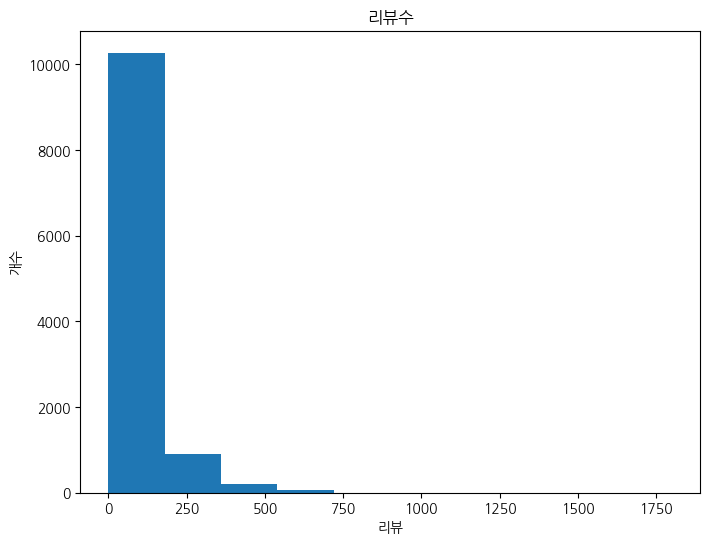

In [ ]:
#히스토그램 구현

plt.figure(figsize=(8,6))
plt.hist(data['number_of_reviews'])
plt.title('리뷰수')
plt.xlabel('리뷰')
plt.ylabel('개수')
plt.show()



---



###룸타입별

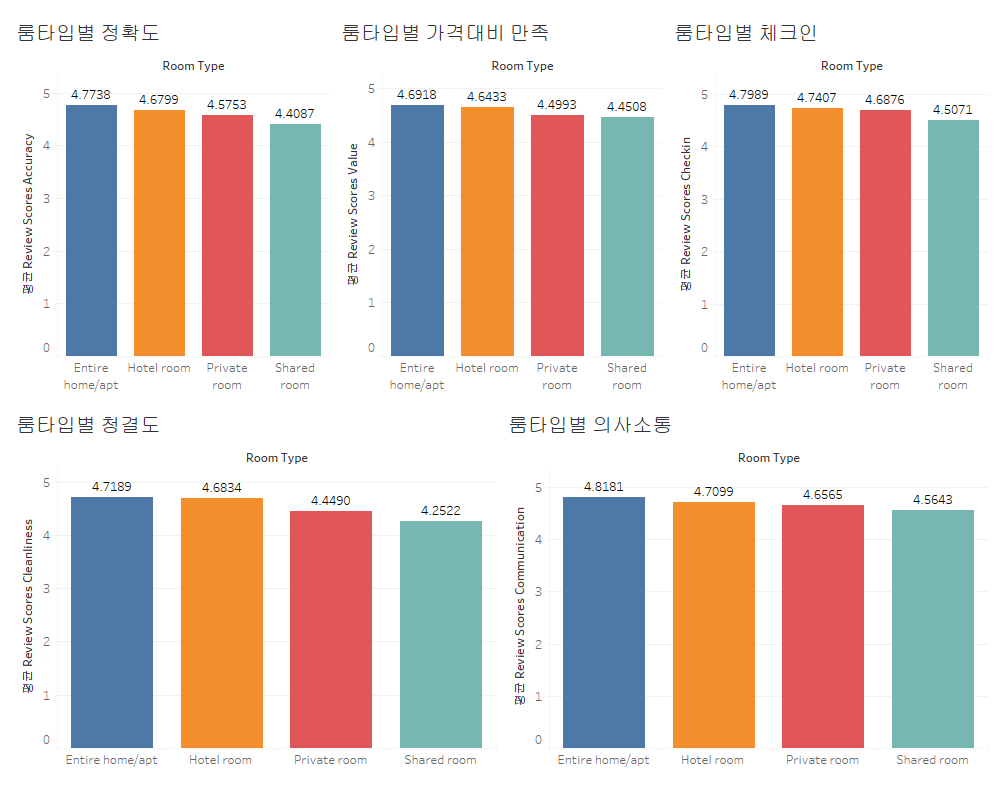